In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr #statistical functions library

In [2]:
file=pd.read_csv('dataset.csv')
print(file.head())

   Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

  ...  RelationshipSatisfaction StockOptionLevel  TotalWorkingYears 

In [3]:
#checking the type of data
print(file.dtypes)

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

In [4]:
#To check the type of the problem, let's find no of 0's and 1's
file['Attrition'].value_counts()
#conclusion: It is a class imbalance problem.
#The class 1 is less likely than 0.

0    856
1    172
Name: Attrition, dtype: int64

In [5]:
#Some more visualizations to follow.
#See the details of ess likely class that is class 1


file[(file['Attrition'] == 1)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,0,8,0,1,6,4,0,5,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,0,7,3,3,0,0,0,0,2
14,28,1,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,0,6,4,3,4,2,0,3,14
21,36,1,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,0,10,4,3,5,3,0,3,21
24,34,1,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,0,8,2,3,4,2,1,3,24
26,32,1,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,1,33,...,2,0,10,5,3,10,2,6,7,26
33,39,1,Travel_Rarely,895,Sales,5,3,Technical Degree,1,42,...,3,1,19,6,4,1,0,0,0,33
34,24,1,Travel_Rarely,813,Research & Development,1,3,Medical,1,45,...,1,1,6,2,2,2,0,2,0,34
36,50,1,Travel_Rarely,869,Sales,3,2,Marketing,1,47,...,3,0,3,2,3,3,2,0,2,36
42,26,1,Travel_Rarely,1357,Research & Development,25,3,Life Sciences,1,55,...,3,0,1,2,2,1,0,0,1,42


In [6]:
#let's drop the target variable and some others that don't have direct relation in finding out the target one.
a1=file.drop(["Attrition","EmployeeCount","ID"],axis=1)
print(a1.head())

   Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
4   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  Gender         ...           PerformanceRating  \
0                        2  Female         ...                           3   
1                        3    Male         ...                      

In [7]:
import matplotlib.pyplot as plt

#convert the categorical features into suitable numbers
#preprocessing of data
df = pd.get_dummies(file) 

In [8]:
print(df.dtypes)

#All the categorical variables are converted to some numerical form.
#uint8 means unsigned integer

Age                                  int64
Attrition                            int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeCount                        int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurr

In [9]:
#print the basic statistics from the data

print(df.describe())

               Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1028.000000  1028.000000  1028.000000       1028.000000  1028.000000   
mean     36.999027     0.167315   806.551556          9.010700     2.873541   
std       9.444297     0.373439   407.043735          8.078418     1.032840   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.750000          2.000000     2.000000   
50%      36.000000     0.000000   813.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.250000         13.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1028.0     1028.000000              1028.000000  1028.000000   
mean             1.0      710.198444                 2.719844    65.451362   
std              0.0      418.513656                 1

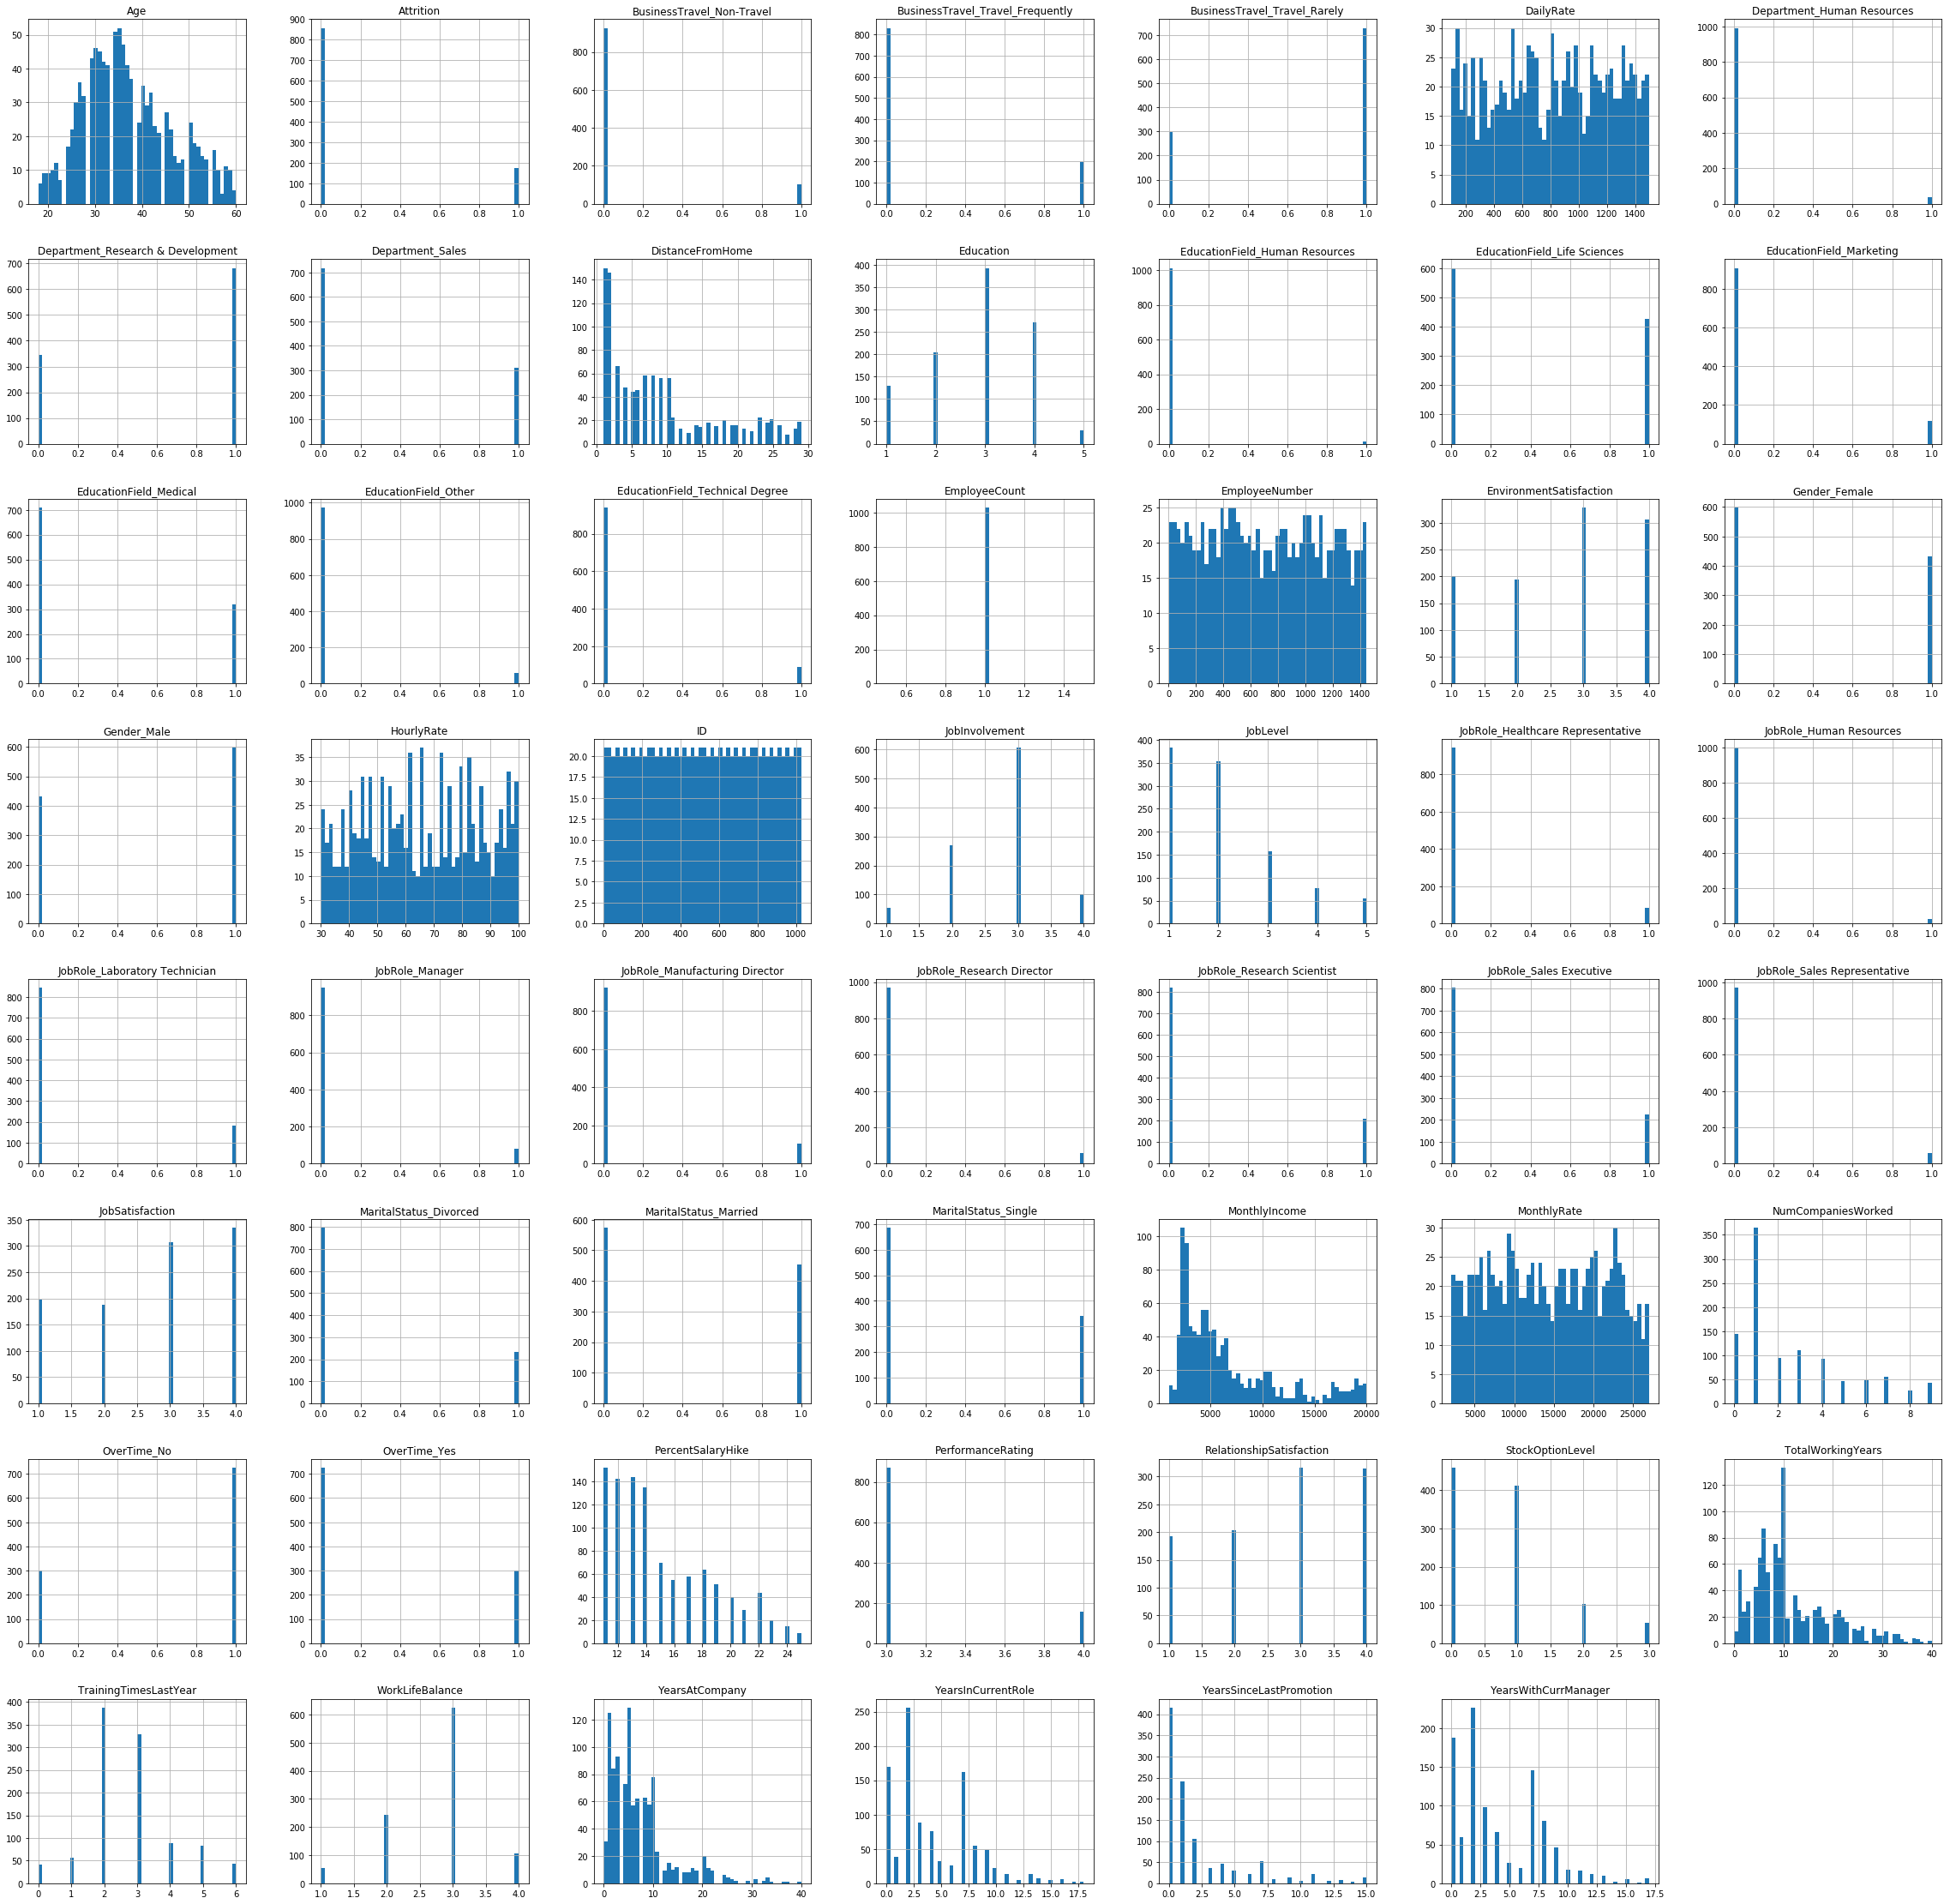

In [10]:
#Use plotting

import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(40,40))
plt.show()